In [2]:
import pickle

features_1 = pickle.load(open('datasets/synthetic/united/features_3.bin', 'rb'))
features_10 = pickle.load(open('datasets/synthetic/united/features_10.bin', 'rb'))
features = features_1 + features_10
n = len(features) 

names = []
x_sizes = []
y_sizes = []
z_sizes = []
v_means = []
v_sigmas = []
curvatures = []

for obj in features:
    name = obj["name"]
    x_size = obj["x_size"]
    y_size = obj["y_size"]
    z_size = obj["z_size"]
    v_mean = obj["v_mean"]
    v_sigma = obj["v_sigma"]
    curvature = obj["curvature"]

    names.append(name)
    x_sizes.append(x_size)
    y_sizes.append(y_size)
    z_sizes.append(z_size)
    v_means.append(v_mean)
    v_sigmas.append(v_sigma)
    curvatures.append(curvature)


800

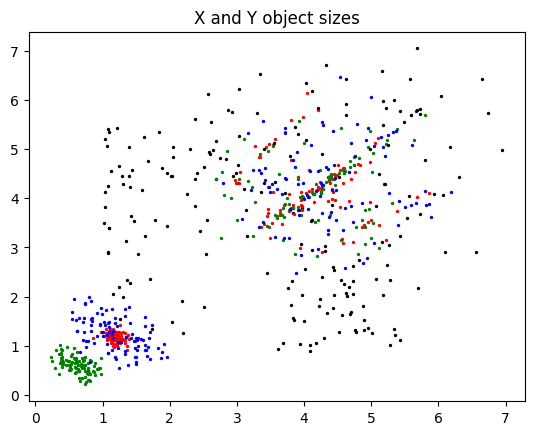

In [3]:
import matplotlib.pyplot as plt

color_sphere = 'red'
color_human = 'green'
color_dolphin = 'blue'
color_drone = 'black'

for i in range(n):
    name = names[i]
    x = x_sizes[i]
    y = y_sizes[i]

    if name == 'sphere':
        color = color_sphere
    if name == 'human':
        color = color_human
    if name == 'dolphin':
        color = color_dolphin
    if name == 'drone':
        color = color_drone

    plt.scatter(x, y, s=2, color=color)

plt.title('X and Y object sizes')
plt.show()

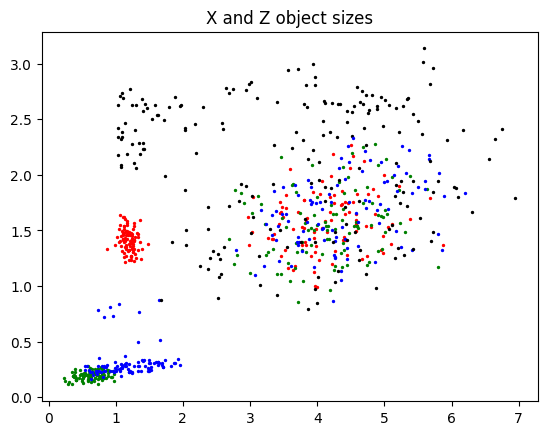

In [4]:
for i in range(n):
    name = names[i]
    x = x_sizes[i]
    y = z_sizes[i]

    if name == 'sphere':
        color = color_sphere
    if name == 'human':
        color = color_human
    if name == 'dolphin':
        color = color_dolphin
    if name == 'drone':
        color = color_drone

    plt.scatter(x, y, s=2, color=color)

plt.title('X and Z object sizes')
plt.show()

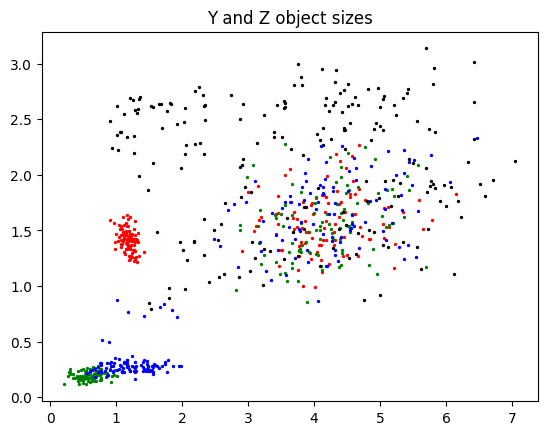

In [5]:
for i in range(n):
    name = names[i]
    x = y_sizes[i]
    y = z_sizes[i]

    if name == 'sphere':
        color = color_sphere
    if name == 'human':
        color = color_human
    if name == 'dolphin':
        color = color_dolphin
    if name == 'drone':
        color = color_drone

    plt.scatter(x, y, s=2, color=color)

plt.title('Y and Z object sizes')
plt.show()

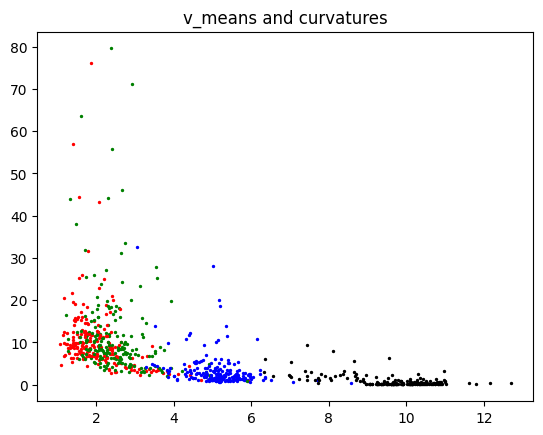

In [6]:
import matplotlib.pyplot as plt

for i in range(n):
    name = names[i]
    x = v_means[i]
    y = curvatures[i]

    if name == 'sphere':
        color = color_sphere
    if name == 'human':
        color = color_human
    if name == 'dolphin':
        color = color_dolphin
    if name == 'drone':
        color = color_drone

    plt.scatter(x, y, s=2, color=color)

plt.title('v_means and curvatures')
plt.show()

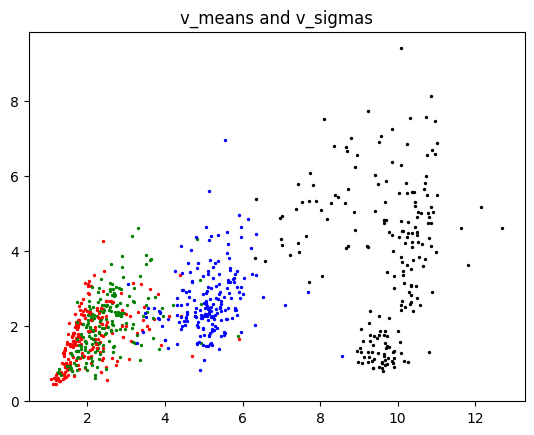

In [7]:
for i in range(n):
    name = names[i]
    x = v_means[i]
    y = v_sigmas[i]

    if name == 'sphere':
        color = color_sphere
    if name == 'human':
        color = color_human
    if name == 'dolphin':
        color = color_dolphin
    if name == 'drone':
        color = color_drone

    plt.scatter(x, y, s=2, color=color)

plt.title('v_means and v_sigmas')
plt.show()

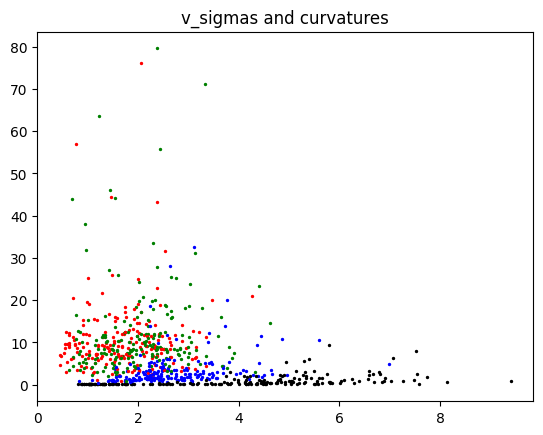

In [8]:
for i in range(n):
    name = names[i]
    x = v_sigmas[i]
    y = curvatures[i]

    if name == 'sphere':
        color = color_sphere
    if name == 'human':
        color = color_human
    if name == 'dolphin':
        color = color_dolphin
    if name == 'drone':
        color = color_drone

    plt.scatter(x, y, s=2, color=color)

plt.title('v_sigmas and curvatures')
plt.show()

In [21]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model, svm
from sklearn import metrics

X = []
Y = []

for i in range(n):
    name = names[i]
    x_size = x_sizes[i]
    y_size = y_sizes[i]
    z_size = z_sizes[i]
    v_mean = v_means[i]
    v_sigma = v_sigmas[i]
    curvature = curvatures[i]

    C = 0
    if name == "human":
        C = 1
    elif name == "dolphin":
        C = 2
    elif name == "drone":
        C = 3

    Y.append(C)
    X.append([x_size, y_size, z_size, v_mean, v_sigma, curvature])

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state = 1)

model = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
model_rfb = svm.SVC(kernel='rbf', gamma=0.5, C=10)
model_poly = svm.SVC(kernel='poly', degree=3, C=1)

#model_rfb.fit(x_train, y_train)
model_rfb.fit(x_train, y_train)

#pickle.dump(model_rfb, open('models/svm/svm_rfb_united_concat_1_10.bin', 'wb'))
#pickle.dump(model_poly, open('models/svm/svm_poly.bin', 'wb'))

model_rfb.score(x_test, y_test)

0.825

In [10]:
model = pickle.load(open('models/svm/svm_rfb_united_concat_1_10.bin', 'rb'))
model.score(x_test, y_test)

0.825

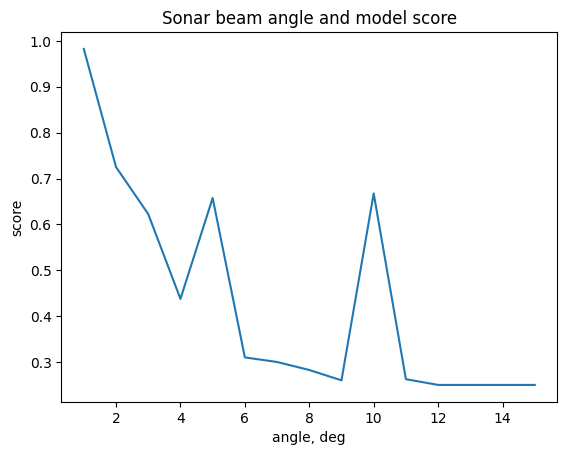

In [16]:
import numpy as np

scores = np.loadtxt('datasets/synthetic/united/scores_concat_1_10.txt', delimiter=' ')

plt.plot(scores[:,0], scores[:,1])

plt.title('Sonar beam angle and model score')
plt.xlabel('angle, deg')
plt.ylabel('score')
plt.show()

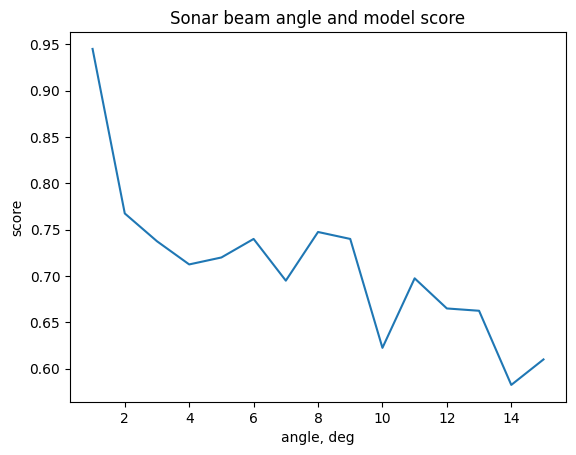

In [1]:
import numpy as np
import matplotlib.pyplot as plt

scores = np.loadtxt('datasets/synthetic/united/scores_concat_all.txt', delimiter=' ')

plt.plot(scores[:,0], scores[:,1])

plt.title('Sonar beam angle and model score')
plt.xlabel('angle, deg')
plt.ylabel('score')
plt.show()

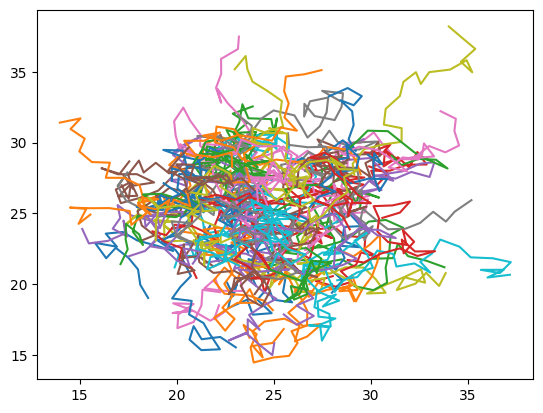

In [9]:
from environment import Environment as env
import matplotlib.pyplot as plt
import numpy as np

v_mean = 10
sigma_v = 1
sigma_angle = 2

for i in range(100):
    x_start = np.random.uniform(20, 30)
    y_start = np.random.uniform(20, 30)
    start = np.array([x_start, y_start, 0])
    angle_start = np.random.uniform(0, 2 * np.pi)
    traj_len = 20

    traj = env.generate_random_trajectory(env, start, angle_start, v_mean, sigma_v, sigma_angle, traj_len)

    xs = traj[:,0]
    ys = traj[:,1]
    plt.plot(xs, ys)

plt.show()


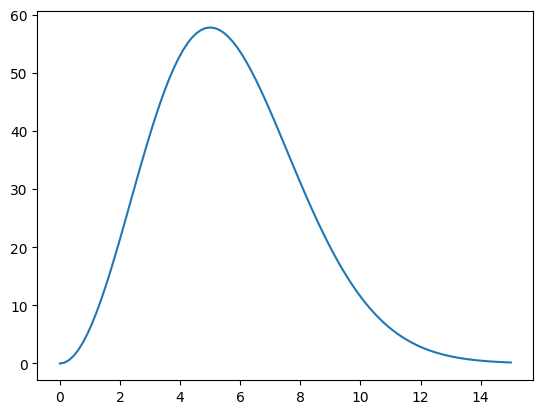

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def diagram(angle):
    sigma_angle = 15 / (3 * np.sqrt(2))
    return np.exp(-(angle**2) / (2 * sigma_angle**2))

def f(r):
    return 2*np.pi*r**2 * diagram(r)

rs = np.linspace(0, 15, 100)
fs = f(rs)

plt.plot(rs, fs)
plt.show()

In [4]:
import numpy as np

traj = []

dt = 0.1
x0 = 10
y0 = 0
z0 = 0
v = 10

for i in range(20):
    x = x0 + v * dt
    y = y0
    z = z0
    point = np.array([x, y, z, 0, 0, 0])
    traj.append(point)

np.savetxt('trajectories/traj_linear_right.txt', traj, delimiter=' ')